# Binary Classification

Source: https://github.com/logictensornetworks/logictensornetworks/blob/master/examples/binary_classification/binary_classification.ipynb

Modified by Erik Mayer:
+ 6/17/2024: To work on Google Colab, added !pip install...
+ 6/20/2024: See below (undone on 6/23/2024?)
+ 6/21/2024: Specifying array values
+ 6/23/2024: Using data from eflux file on GitHub

This is a basic example in which we learn to ground unary predicate $A$ that is defined in the space of $[0,1]^2$.

We define the predicate $A$ to apply to points that are close to the middle point $c=(.5,.5)$.In order to get training data, we randomly sample data from the domain. We split the sample data into two separate sets based on their euclidian distance to $c$. We then define two facts for the predicate $A$. For all points the predicate should apply to, we provide them as positive examples and vice versa for all points that the predicate does not apply to.

To add a local copy of the LogicTensorNetworks repository into your Colab environment, use the following command:

In [1]:
!pip install git+https://github.com/logictensornetworks/logictensornetworks

  Cloning https://github.com/logictensornetworks/logictensornetworks to /tmp/pip-req-build-bslz2zc4
  Running command git clone --filter=blob:none --quiet https://github.com/logictensornetworks/logictensornetworks /tmp/pip-req-build-bslz2zc4
  Resolved https://github.com/logictensornetworks/logictensornetworks to commit d62d101f90be8ec029de90cb1db5df01c2c58d72
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ltn: filename=ltn-2.1-py3-none-any.whl size=13028 sha256=2ce4013d43ddf61dd08a32ff184c3d81c05f91481214b5e08c9934cbfd4c4d1b
  Stored in directory: /tmp/pip-ephem-wheel-cache-2egz8zqf/wheels/85/92/5c/138f4ade7bf608ca2b334e77af7af507a4e60bcb33b088f529
Successfully built ltn


In [2]:
import logging; logging.basicConfig(level=logging.INFO)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import ltn

plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1

Sample random data from $[0,1]^2$. Our groundtruth positive training data for $A$ is close to the center (.5,.5). All other data is considered as negative examples.

# E.M. modifications 6/23/2024

Read data from IMF file on GitHub (see File_reading_2024_0623_a0607.ipynb)

In [3]:
import pandas as pd

import numpy as np

In [4]:
# input data

df_IMF = pd.read_csv(r"https://raw.githubusercontent.com/ErikMayerPSU/AuroraNSL_2024/main/data/St%20patrick's%20day%202015/20150317_IMF.txt", header=None, nrows=1, delim_whitespace=True, on_bad_lines='skip')

# Define new headers
IMF_headers = ["Year", "Month", "Day", "Hour", "Min", "Sec", "Msec", "Bx[nT]", "By[nT]", "Bz[nT]", "Vx[km/s]", "Vy[km/s]", "Vz[km/s]", "N[cm^(-3)]", "T[Kelvin]"]

# Set the column headers
df_IMF.columns = IMF_headers

df_IMF

,Year,Month,Day,Hour,Min,Sec,Msec,Bx[nT],By[nT],Bz[nT],Vx[km/s],Vy[km/s],Vz[km/s],N[cm^(-3)],T[Kelvin]
0,2015,3,17,0,0,0,0,-4.41,-0.319,6.176,-422.716,13.163,-5.809,12.914,43258.2


In [5]:
# output data

df_eflux = pd.read_csv(r"https://raw.githubusercontent.com/ErikMayerPSU/AuroraNSL_2024/main/data/St%20patrick's%20day%202015/Eflux/20150317_0000UT_Eflux_e%2Call.txt", header=None, skiprows=1, nrows=7680, delim_whitespace=True, on_bad_lines='skip')

# Define new headers
eflux_headers = ["MLT", "ML", "[mW m^-2]"]

# Set the column headers
df_eflux.columns = eflux_headers

df_eflux

,MLT,ML,[mW m^-2]
0,0.00,50.0,0.01179
1,0.00,50.5,0.01406
2,0.00,51.0,0.01231
3,0.00,51.5,0.01006
4,0.00,52.0,0.04787
...,...,...,...
7675,23.75,87.5,0.05943
7676,23.75,88.0,0.03776
7677,23.75,88.5,0.01866
7678,23.75,89.0,0.02547


In [6]:
array_eflux = df_eflux.to_numpy()
array_eflux

array([[0.000e+00, 5.000e+01, 1.179e-02],
       [0.000e+00, 5.050e+01, 1.406e-02],
       [0.000e+00, 5.100e+01, 1.231e-02],
       ...,
       [2.375e+01, 8.850e+01, 1.866e-02],
       [2.375e+01, 8.900e+01, 2.547e-02],
       [2.375e+01, 8.950e+01, 1.202e-02]])

In [23]:
array_eflux_mag_coordinates = array_eflux[0:7680,0:2]
array_eflux_mag_coordinates
data = array_eflux_mag_coordinates
data

array([[ 0.  , 50.  ],
       [ 0.  , 50.5 ],
       [ 0.  , 51.  ],
       ...,
       [23.75, 88.5 ],
       [23.75, 89.  ],
       [23.75, 89.5 ]])

In [24]:
array_eflux_flux = array_eflux[0:7680,2:3]
print(array_eflux_flux)
# Flatten to 1-D array
array_eflux_flux_flatten = array_eflux_flux.flatten(order = 'C')
print(array_eflux_flux_flatten)


[[0.01179]
 [0.01406]
 [0.01231]
 ...
 [0.01866]
 [0.02547]
 [0.01202]]
[0.01179 0.01406 0.01231 ... 0.01866 0.02547 0.01202]


In [25]:
labels = array_eflux_flux_flatten > 1
# labels_b = np.sum(np.square(data_b-[.5,.5]),axis=1)<.16
print(labels)

[False False False ... False False False]


Data for A:
[[ 0.   50.  ]
 [ 0.   50.5 ]
 [ 0.   51.  ]
 ...
 [23.75 88.5 ]
 [23.75 89.  ]
 [23.75 89.5 ]]
[False False False ... False False False]


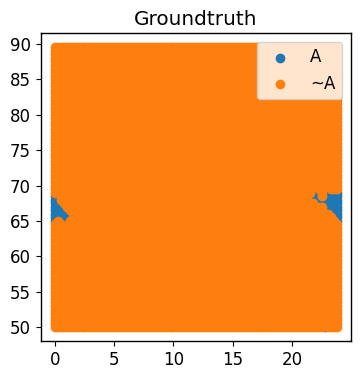

Data for B:
[[0.55 0.55]
 [0.65 0.65]
 [0.45 0.45]
 [0.35 0.35]
 [0.25 0.25]
 [0.15 0.15]]
[ True  True  True  True  True False]


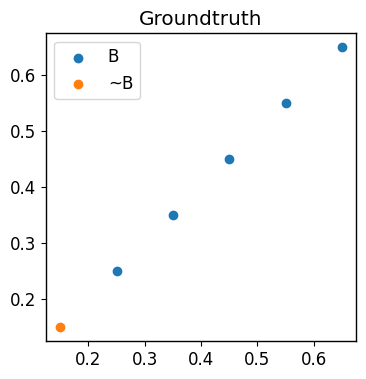

Plotting A and B on same graph


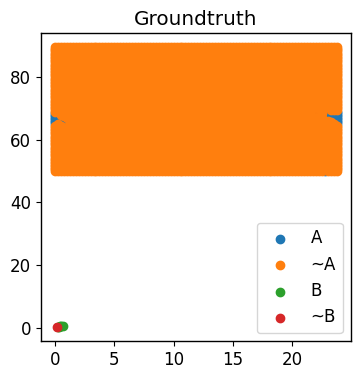

Concatendated A and B data (6/23/2024: just using A):
[[ 0.   50.  ]
 [ 0.   50.5 ]
 [ 0.   51.  ]
 ...
 [23.75 88.5 ]
 [23.75 89.  ]
 [23.75 89.5 ]]
[False False False ... False False False]
<_BatchDataset element_spec=(TensorSpec(shape=(None, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.bool, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 2), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.bool, name=None))>


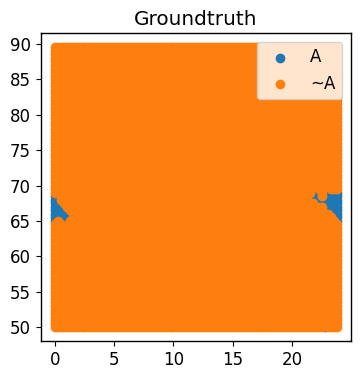

In [29]:
batch_size=64
nr_samples = 7680 # previously 100
half_nr_samples = 6 # no longer used? Only used when randomizing test data?
nr_samples_train = 5760 # previously 50 E.M. - Why no nr_samples_test ?
# data = np.random.uniform([0,0],[1,1],(half_nr_samples,2))
# data from eflux file (see above): data    = np.array([[0.5,0.5],[0.6,0.6],[0.4,0.4],[0.3,0.3],[0.2,0.2],[0.1,0.1]],  dtype=float)

# Data for A from eflux file on GitHub
print("Data for A:")
print(data) # Added E.M.
# E.M. Changed from [.5,.5] to [.5,1] below:
# labels from eflux file (see above): labels = np.sum(np.square(data-[.5,.5]),axis=1)<.09
# This doesn't work. Error: label needs to be integer or boolean: labels = np.sum(np.square(data-[.5,.5]),axis=1)
print(labels) # Added E.M.

plt.figure(figsize=(4,4))
plt.scatter(data[labels][:,0],data[labels][:,1],label='A')
plt.scatter(data[np.logical_not(labels)][:,0],data[np.logical_not(labels)][:,1],label='~A')

#plt.scatter(data_b[labels_b][:,0],data_b[labels_b][:,1],label='B')
#plt.scatter(data_b[np.logical_not(labels_b)][:,0],data_b[np.logical_not(labels_b)][:,1],label='~B')

plt.title("Groundtruth")
plt.legend()
plt.show()

# Test points for B dataset
print("Data for B:")
# data_b = np.random.uniform([0,0],[1,1],(half_nr_samples,2))
data_b    = np.array([[0.55,0.55],[0.65,0.65],[0.45,0.45],[0.35,0.35],[0.25,0.25],[0.15,0.15]],  dtype=float)
print(data_b) # Added E.M.
# E.M. Changed from [.5,.5] to [.5,1] below:
labels_b = np.sum(np.square(data_b-[.5,.5]),axis=1)<.16
# This doesn't work. Error: label needs to be integer or boolean: labels = np.sum(np.square(data-[.5,.5]),axis=1)
print(labels_b) # Added E.M.

plt.figure(figsize=(4,4))
#plt.scatter(data[labels][:,0],data[labels][:,1],label='A')
#plt.scatter(data[np.logical_not(labels)][:,0],data[np.logical_not(labels)][:,1],label='~A')

plt.scatter(data_b[labels_b][:,0],data_b[labels_b][:,1],label='B')
plt.scatter(data_b[np.logical_not(labels_b)][:,0],data_b[np.logical_not(labels_b)][:,1],label='~B')

plt.title("Groundtruth")
plt.legend()
plt.show()

print("Plotting A and B on same graph")

plt.figure(figsize=(4,4))
plt.scatter(data[labels][:,0],data[labels][:,1],label='A')
plt.scatter(data[np.logical_not(labels)][:,0],data[np.logical_not(labels)][:,1],label='~A')

plt.scatter(data_b[labels_b][:,0],data_b[labels_b][:,1],label='B')
plt.scatter(data_b[np.logical_not(labels_b)][:,0],data_b[np.logical_not(labels_b)][:,1],label='~B')

plt.title("Groundtruth")
plt.legend()
plt.show()

print("Concatendated A and B data (6/23/2024: just using A):")
#data = np.concatenate((data, data_b))
#labels = np.concatenate((labels, labels_b))

print(data)
print(labels)

# Below comment doesn't seem to match program
# 400 examples for training; 100 examples for training
ds_train = tf.data.Dataset\
        .from_tensor_slices((data[:nr_samples_train],labels[:nr_samples_train]))\
        .batch(batch_size)
print (ds_train) # Added E. M
ds_test = tf.data.Dataset\
        .from_tensor_slices((data[nr_samples_train:],labels[nr_samples_train:]))\
        .batch(batch_size)
print (ds_test) # Added E. M
plt.figure(figsize=(4,4))
plt.scatter(data[labels][:,0],data[labels][:,1],label='A')
plt.scatter(data[np.logical_not(labels)][:,0],data[np.logical_not(labels)][:,1],label='~A')

#plt.scatter(data_b[labels_b][:,0],data_b[labels_b][:,1],label='B')
#plt.scatter(data_b[np.logical_not(labels_b)][:,0],data_b[np.logical_not(labels_b)][:,1],label='~B')



plt.title("Groundtruth")
plt.legend()
plt.show()


Define the predicate $A$. $A$ has arity 1 (single argument). The dimension of the argument is 2 (since the domain is $[0,1]^2$).

In [30]:
A = ltn.Predicate.MLP([2],hidden_layer_sizes=(16,16))

Import some operators to write the axioms.

In [31]:
Not = ltn.Wrapper_Connective(ltn.fuzzy_ops.Not_Std())
And = ltn.Wrapper_Connective(ltn.fuzzy_ops.And_Prod())
Or = ltn.Wrapper_Connective(ltn.fuzzy_ops.Or_ProbSum())
Implies = ltn.Wrapper_Connective(ltn.fuzzy_ops.Implies_Reichenbach())
Forall = ltn.Wrapper_Quantifier(ltn.fuzzy_ops.Aggreg_pMeanError(p=2),semantics="forall")
Exists = ltn.Wrapper_Quantifier(ltn.fuzzy_ops.Aggreg_pMean(p=2),semantics="exists")

Now we add some facts to the knowledgebase. We express that for all points in $\mathrm{data\_A}$, $A$ should be true. For all points in $\mathrm{data\_not\_A}$, $A$ is not true.

In [32]:
formula_aggregator = ltn.Wrapper_Formula_Aggregator(ltn.fuzzy_ops.Aggreg_pMeanError(p=2))

@tf.function
def axioms(data, labels):
    x_A = ltn.Variable("x_A",data[labels])
    x_not_A = ltn.Variable("x_not_A",data[tf.logical_not(labels)])
   # x_B = ltn.Variable("x_B",data_b[labels_b])
   # x_not_B = ltn.Variable("x_not_B",data_b[tf.logical_not(labels_b)])
    axioms = [
        Forall(x_A, A(x_A)),
        Forall(x_not_A, Not(A(x_not_A)))
    ]
    sat_level = formula_aggregator(axioms).tensor
    return sat_level

Initialize all layers and the static graph.

In [33]:
for _data, _labels in ds_test:
    print("Initial sat level %.5f"%axioms(_data, _labels))
    break


Initial sat level nan


Train on the knowledgebase.

In [ ]:
mean_metrics = tf.keras.metrics.Mean()

trainable_variables = A.trainable_variables
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
for epoch in range(2000):
    for _data, _labels in ds_train:
        with tf.GradientTape() as tape:
            loss = 1. - axioms(_data, _labels)
        grads = tape.gradient(loss, trainable_variables)
        optimizer.apply_gradients(zip(grads, trainable_variables))
    if epoch%100 == 0:
        mean_metrics.reset_states()
        for _data, _labels in ds_test:
            mean_metrics(axioms(_data, _labels))
        print("Epoch %d: Sat Level %.3f"%(epoch, mean_metrics.result() ))
mean_metrics.reset_states()
for _data, _labels in ds_test:
    mean_metrics(axioms(_data, _labels))
print("Training finished at Epoch %d with Sat Level %.3f"%(epoch, mean_metrics.result() ))

Epoch 0: Sat Level nan
Epoch 100: Sat Level nan
Epoch 200: Sat Level nan


The following queries the database on training data and test data. Vizualisation show the extent of generalization.

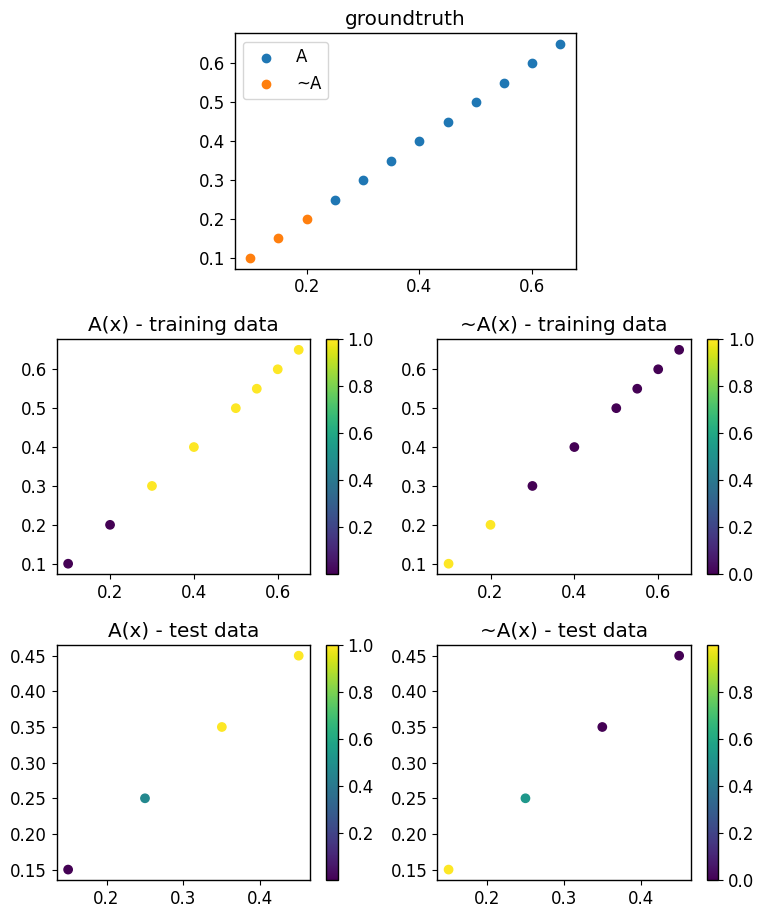

In [ ]:
fig = plt.figure(figsize=(9, 11))

plt.subplots_adjust(wspace=0.2,hspace=0.3)
ax = plt.subplot2grid((3,8),(0,2),colspan=4)
ax.set_title("groundtruth")
ax.scatter(data[labels][:,0],data[labels][:,1],label='A')
ax.scatter(data[np.logical_not(labels)][:,0],data[np.logical_not(labels)][:,1],label='~A')
ax.legend()

# Training data
x = ltn.Variable("x",data[:nr_samples_train])
fig.add_subplot(3, 2, 3)
result=A(x)
plt.title("A(x) - training data")
plt.scatter(data[:nr_samples_train,0],data[:nr_samples_train,1],c=result.tensor.numpy().squeeze())
plt.colorbar()

fig.add_subplot(3, 2, 4)
result=Not(A(x))
plt.title("~A(x) - training data")
plt.scatter(data[:nr_samples_train,0],data[:nr_samples_train,1],c=result.tensor.numpy().squeeze())
plt.colorbar()

# Test data
x = ltn.Variable("x",data[nr_samples_train:])
fig.add_subplot(3, 2, 5)

result=A(x)
plt.title("A(x) - test data")
plt.scatter(data[nr_samples_train:,0],data[nr_samples_train:,1],c=result.tensor.numpy().squeeze())
plt.colorbar()

fig.add_subplot(3, 2, 6)
result=Not(A(x))
plt.title("~A(x) - test data")
plt.scatter(data[nr_samples_train:,0],data[nr_samples_train:,1],c=result.tensor.numpy().squeeze())
plt.colorbar()
plt.savefig("ex_binary_testing.pdf")
plt.show()